In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

### Import Datasets

In [2]:
df = pd.read_csv('./data/vgsales.csv')
vg_reviews = pd.read_csv('./data/video_games_reviews.csv')
vg_reviews.drop(columns=['Unnamed: 0'],inplace=True)

In [3]:
df.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
vg_reviews.head(5)

,Name,Platform,Year,Review
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,11/23/1998,99
1,Tony Hawk's Pro Skater 2,PlayStation,9/20/2000,98
2,Grand Theft Auto IV,PlayStation 3,4/29/2008,98
3,SoulCalibur,Dreamcast,9/8/1999,98
4,Grand Theft Auto IV,Xbox 360,4/29/2008,98


### Data Cleaning

In [5]:
# convert str year to date
vg_reviews['Year'] = pd.to_datetime(vg_reviews['Year']).dt.year
df['Year'] = pd.to_datetime(df['Year']).dt.year

#### Check Missing Values

In [6]:
df.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [8]:
total_cells = np.product(df.shape)
total_missing_values = df.isna().sum()
percent_missing = (total_missing_values.sum() / total_cells) * 100
percent_missing

0.18019695691704368

<AxesSubplot:>

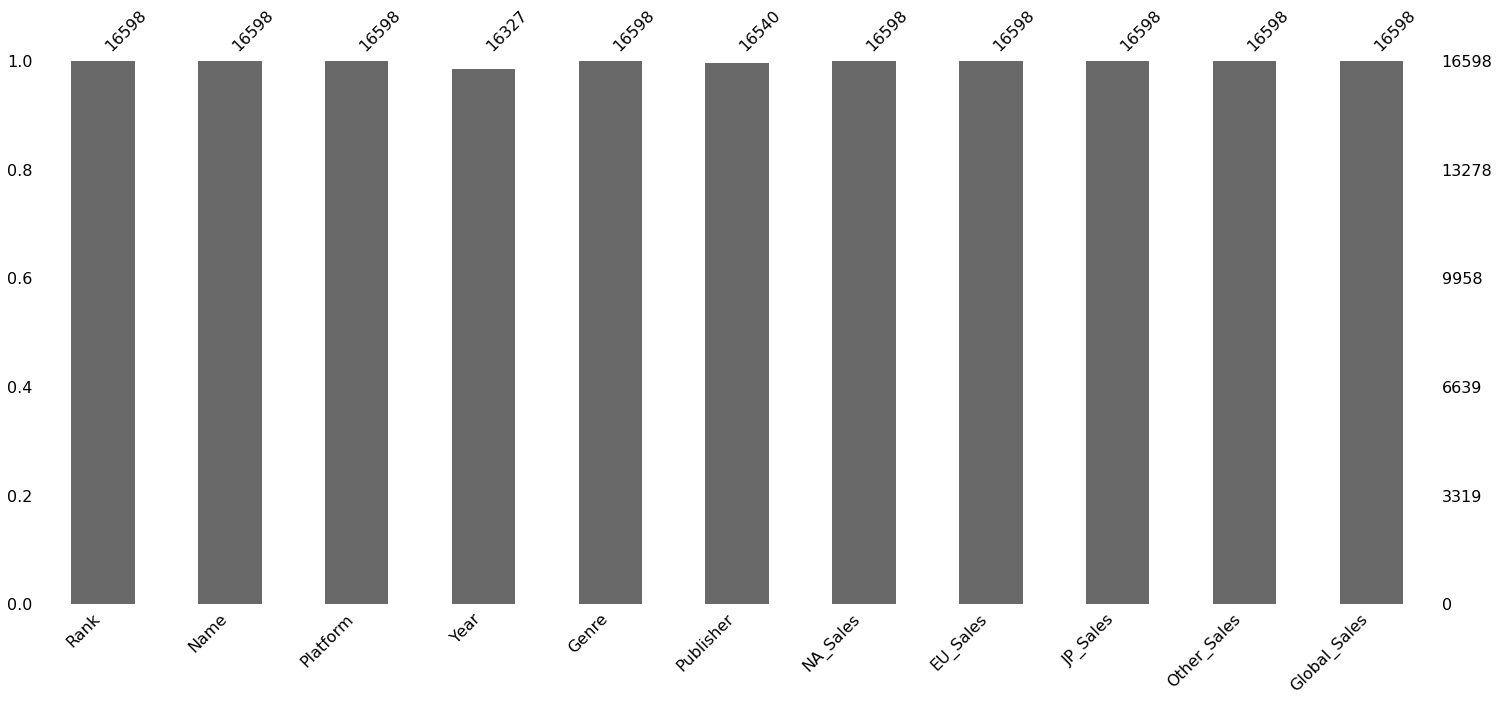

In [10]:
import missingno as msno
msno.bar(df)

<AxesSubplot:>

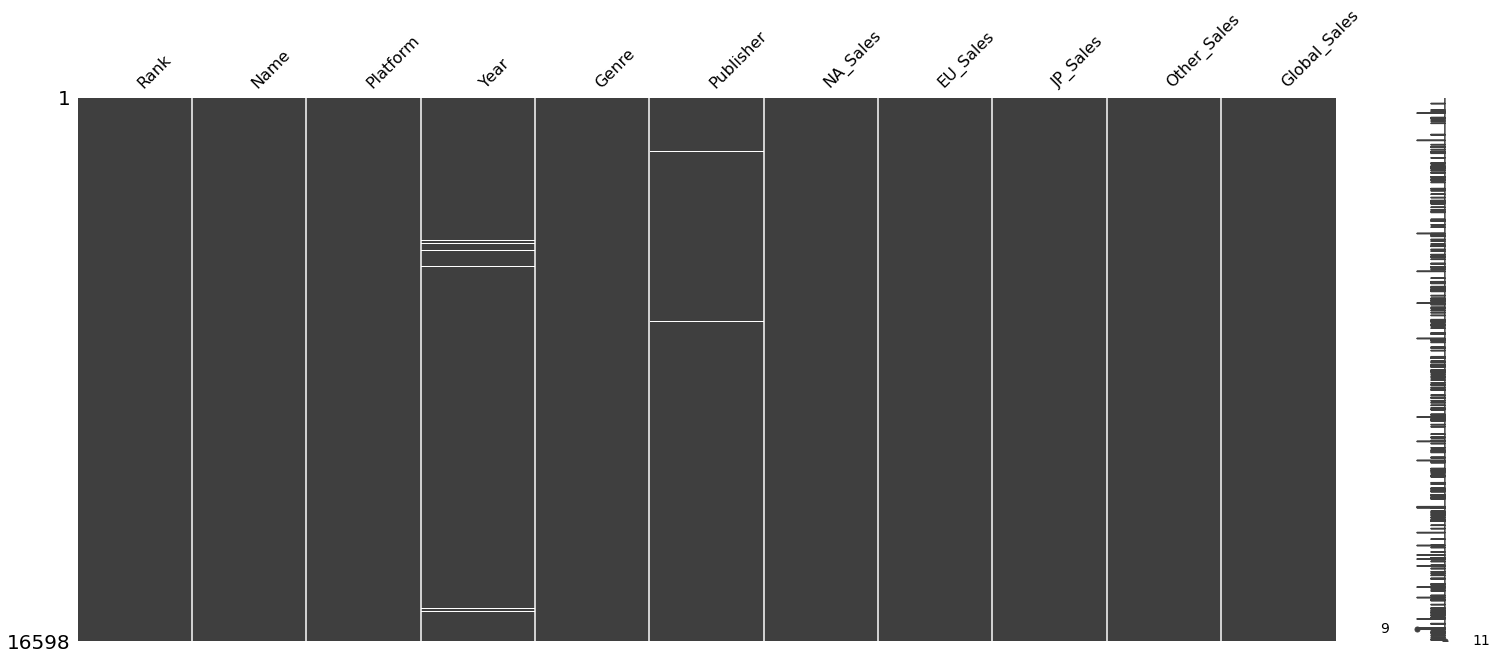

In [11]:
msno.matrix(df)

In [13]:
df.dropna(inplace=True)
df['Year'] = df['Year'].astype('int')

In [18]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,1970,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1970,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,1970,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,1970,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1970,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,1970,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,1970,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,1970,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,1970,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01
